In [1]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from plotly_helper import log10, get_log10_ticks

pio.templates.default = 'plotly_white+presentation'
pio.renderers.default = 'plotly_mimetype+notebook_connected+png'
px.defaults.color_continuous_scale = px.colors.sequential.Blugrn
px.defaults.color_discrete_sequence = px.colors.qualitative.Dark24

In [2]:
iris = px.data.iris()

## Basic scatter plot

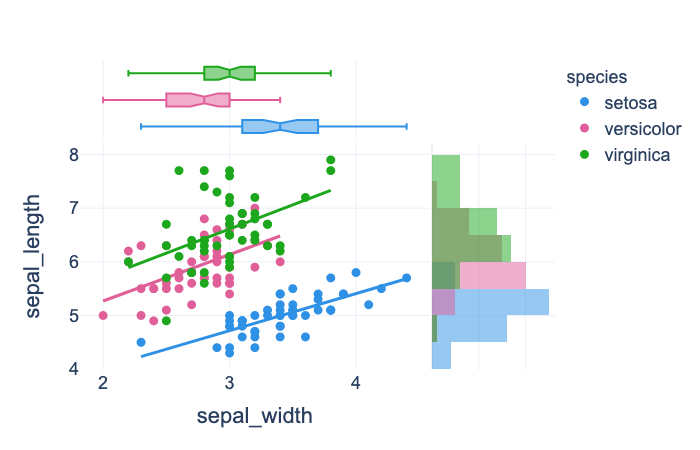

In [3]:
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species", marginal_y="histogram", marginal_x="box", trendline="ols")
fig.show(config={'displaylogo': False})

Add diagonal line manually.

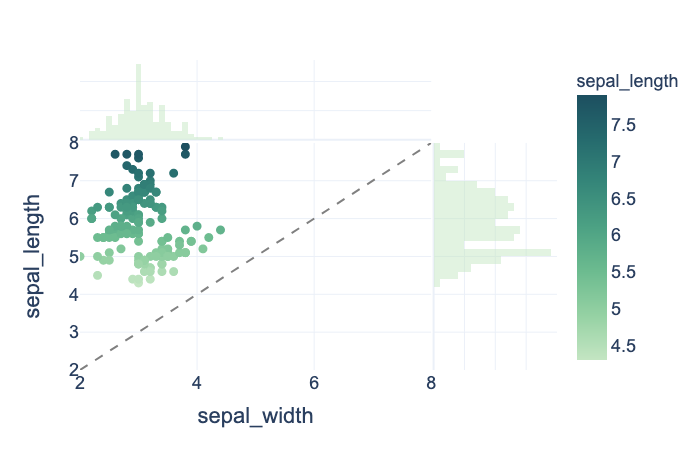

In [4]:
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="sepal_length", marginal_y="histogram", marginal_x="histogram", range_x=[2, 8], range_y=[2, 8])
fig.update_traces(selector=dict(type="histogram"), nbinsx=40, nbinsy=20)
fig.add_shape(type="line", x0=2, y0=2, x1=8, y1=8, line_color="grey", line_dash="dash")
#fig.update_layout(shapes = [{'type': 'line', 'yref': 'paper', 'xref': 'paper', 'y0': 0, 'y1': 1, 'x0': 0, 'x1': 1}])
fig.show(config={'displaylogo': False})

## Log-scale

Since histogram doesn't support log-scale bin size, we need to convert values to log-scale before plotting marginal histogram.

In [5]:
tips = px.data.tips()
tips.loc[240, "total_bill"] = -27. # Introduce a negative value for testing log scale.

In [6]:
tips['log10_total_bill'] = log10(tips['total_bill'])
tips['log10_tip'] = log10(tips['tip'])
total_bill_ticktext, total_bill_tickvals = get_log10_ticks(tips['total_bill'])
tip_ticktext, tip_tickvals = get_log10_ticks(tips['tip'])

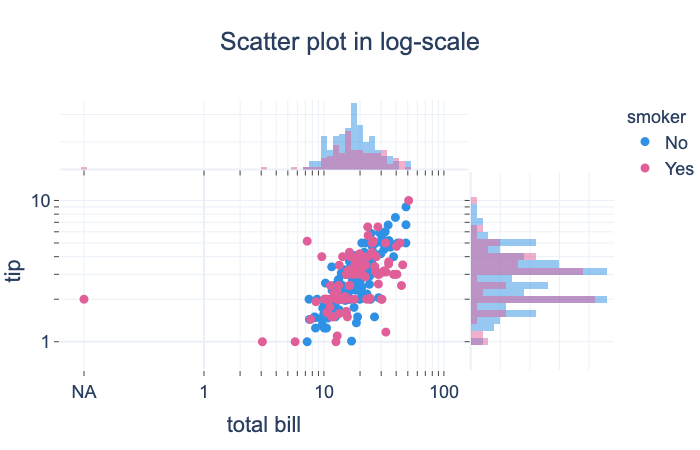

In [7]:
fig = px.scatter(tips, x="log10_total_bill", y="log10_tip", color="smoker", marginal_y="histogram", marginal_x="histogram",
    hover_data=dict(total_bill=True, tip=True, log10_total_bill=False, log10_tip=False),
    range_x=[total_bill_tickvals.min() - 0.2, total_bill_tickvals.max() + 0.2],
    range_y=[tip_tickvals.min() - 0.2, tip_tickvals.max() + 0.2],
    title="Scatter plot in log-scale")
fig.for_each_xaxis(lambda axis: axis.update(ticks="outside", ticktext=total_bill_ticktext, tickvals=total_bill_tickvals, tickangle=0) if axis.anchor != 'y2' else (),)
fig.for_each_yaxis(lambda axis: axis.update(ticks="outside", ticktext=tip_ticktext, tickvals=tip_tickvals, tickangle=0) if axis.anchor != 'x3' else (),)
fig.update_layout(xaxis_title="total bill", yaxis_title="tip", title_x=0.5, margin=dict(l=0))
fig.update_traces(selector=dict(type="histogram"), nbinsx=80, nbinsy=40)
fig.show(config={'displaylogo': False})

If we don't need marginal histogram, we can use the built-in log-scale options.

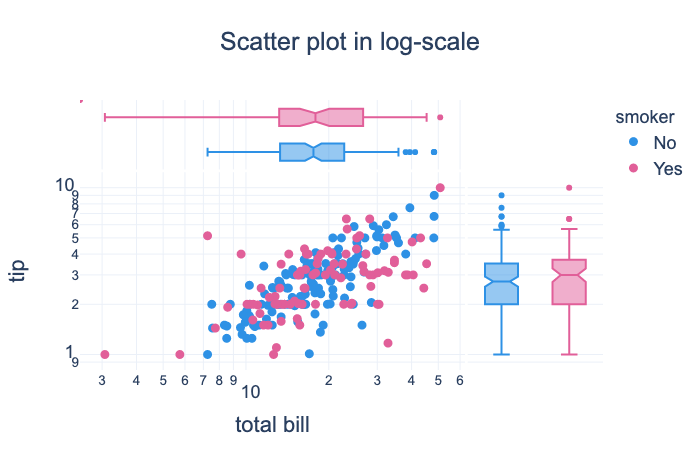

In [8]:
fig = px.scatter(tips, x="total_bill", y="tip", color="smoker", marginal_y="box", marginal_x="box",
    log_x=True, log_y=True,
    title="Scatter plot in log-scale")
fig.update_layout(xaxis_title="total bill", yaxis_title="tip", title_x=0.5)
fig.show(config={'displaylogo': False})